##Data Pre-processing

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

column_names = [
    "Unique Key", "Created Date", "Closed Date", "Agency", "Agency Name",
    "Complaint Type", "Descriptor", "Location Type", "Incident Zip", "Incident Address",
    "Street Name", "Cross Street 1", "Cross Street 2", "Intersection Street 1",
    "Intersection Street 2", "Address Type", "City", "Landmark", "Facility Type",
    "Status", "Due Date", "Resolution Description", "Resolution Action Updated Date",
    "Community Board", "BBL", "Borough", "X Coordinate (State Plane)",
    "Y Coordinate (State Plane)", "Open Data Channel Type", "Park Facility Name",
    "Park Borough", "Vehicle Type", "Taxi Company Borough", "Taxi Pick Up Location",
    "Bridge Highway Name", "Bridge Highway Direction", "Road Ramp",
    "Bridge Highway Segment", "Latitude", "Longitude", "Location"
]

# Load the CSV file with headers
data = pd.read_csv('nyc_2020.csv',  header=None, names=column_names, low_memory=False)

##Task1

<ipython-input-4-c494b7b00e4a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noise_data['Complaint Subtype'] = noise_data['Complaint Type'].str.replace("Noise - ", "")
<ipython-input-4-c494b7b00e4a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noise_data['Created Date'] = pd.to_datetime(noise_data['Created Date'])
<ipython-input-4-c494b7b00e4a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

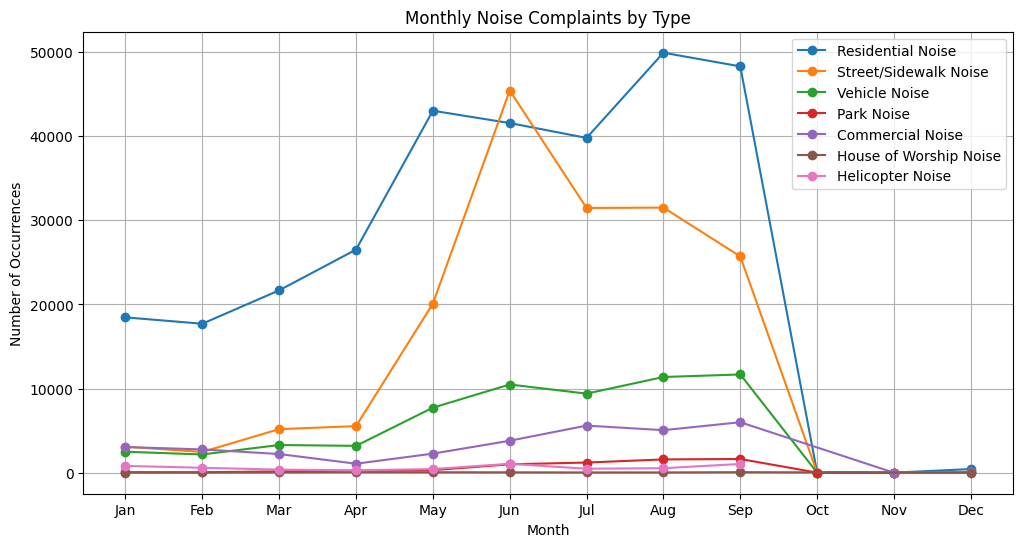

In [ ]:
# Filter the data to include only noise complaints
noise_data = data[data['Complaint Type'].str.startswith("Noise - ")]

# Extract the complaint subtype (excluding "Noise - ")
noise_data['Complaint Subtype'] = noise_data['Complaint Type'].str.replace("Noise - ", "")

# Convert 'Created Date' to a datetime object
noise_data['Created Date'] = pd.to_datetime(noise_data['Created Date'])

# Extract the month from the 'Created Date' column
noise_data['Month'] = noise_data['Created Date'].dt.month

plt.figure(figsize=(12, 6))

complaint_subtypes = noise_data['Complaint Subtype'].unique()

for subtype in complaint_subtypes:
    subset = noise_data[noise_data['Complaint Subtype'] == subtype]

    monthly_counts = subset.groupby('Month').size()

    plt.plot(monthly_counts.index, monthly_counts.values, marker='o', label=f"{subtype} Noise")

plt.title("Monthly Noise Complaints by Type")
plt.xlabel("Month")
plt.ylabel("Number of Occurrences")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

##Task2

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
1072,46829542,07/11/2020 08:42:14 PM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Other (Explain Below),11106.0,31 DRIVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.112385,-77.519584,"(40.1123853, -77.5195844)"
32195,45004530,11/23/2019 12:06:07 PM,01/02/2020 02:07:25 PM,DOHMH,Department of Health and Mental Hygiene,Rodent,Mouse Sighting,Other (Explain Below),11212.0,17 BRISTOL STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670745,-73.912932,"(40.6707453, -73.9129316)"
39445,45158596,12/14/2019 06:42:56 PM,01/02/2020 04:28:43 PM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Other (Explain Below),10014.0,109 BEDFORD STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.732747,-74.005643,"(40.7327467, -74.0056433)"
43629,45209047,12/20/2019 10:24:29 PM,01/02/2020 02:32:20 PM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Other (Explain Below),11233.0,2399 FULTON STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.677924,-73.904201,"(40.6779242, -73.9042011)"
44793,45224145,12/23/2019 01:39:20 AM,01/06/2020 12:33:26 PM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Other (Explain Below),11226.0,1509 NEWKIRK AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.635645,-73.963105,"(40.6356446, -73.9631055)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1952010,46509763,06/17/2020 10:04:39 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Other (Explain Below),11361.0,209-80 45 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.758448,-73.773403,"(40.7584481, -73.7734025)"
1952183,46524940,06/18/2020 10:09:55 PM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Other (Explain Below),11205.0,NOSTRAND AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.112385,-77.519584,"(40.1123853, -77.5195844)"
1953577,46480966,06/14/2020 10:11:28 PM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Other (Explain Below),10456.0,3463 3 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.829837,-73.906407,"(40.8298368, -73.906407)"
1954134,46509033,06/17/2020 10:18:32 PM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Signs of Rodents,Other (Explain Below),11385.0,566 ONDERDONK AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.705629,-73.910019,"(40.7056291, -73.9100186)"


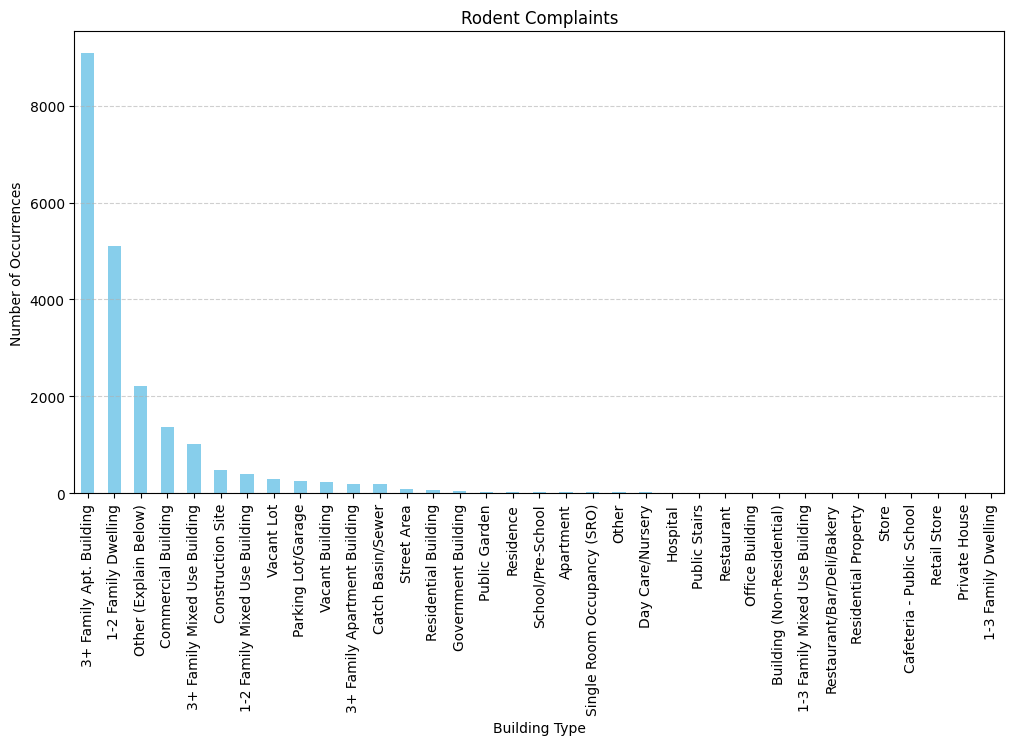

In [ ]:

# Filter the data to include only sanitation issues related to rodents in 2020
sanitation_data = data[(data['Complaint Type'] == "Rodent")]

# Count the number of sanitation issues for each facility type
facility_counts = sanitation_data['Location Type'].value_counts()
display(sanitation_data[(sanitation_data['Location Type'] == "Other (Explain Below)")])

# Create a bar chart
plt.figure(figsize=(12, 6))
facility_counts.plot(kind='bar', color='skyblue')
plt.title("Rodent Complaints")
plt.xlabel("Building Type")
plt.ylabel("Number of Occurrences")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()